### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
#I look at data types to see is mis-matched data types exist that could be problematic
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [18]:
data.sort_values('coupon', ascending=True) 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11702,Home,Partner,Sunny,30,10PM,Bar,2h,Female,50plus,Married partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,0
9930,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,21,Single,...,gt8,gt8,gt8,4~8,1,0,0,0,1,0
10632,Home,Alone,Rainy,55,6PM,Bar,1d,Male,21,Single,...,never,gt8,less1,less1,1,1,1,0,1,0
7997,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,26,Unmarried partner,...,never,4~8,never,1~3,1,1,0,0,1,1
11166,Work,Alone,Snowy,30,7AM,Bar,1d,Female,41,Married partner,...,4~8,gt8,1~3,less1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,31,Unmarried partner,...,less1,1~3,1~3,less1,1,0,0,1,0,1
5447,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,50plus,Single,...,never,less1,less1,never,1,0,0,1,0,0
10478,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Female,31,Unmarried partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
5440,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,50plus,Single,...,never,less1,less1,never,1,1,0,0,1,0


In [45]:
unique_responses_count = data['Bar'].nunique()
print(unique_responses_count)

5


In [15]:
# I use .info to first find columns with missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [23]:
missing_data = data['Bar'].isnull()


In [30]:
missing_by_group = data.groupby('Y')['Bar'].apply(lambda x: x.isnull().sum())
print(missing_by_group)

Y
0    52
1    55
Name: Bar, dtype: int64


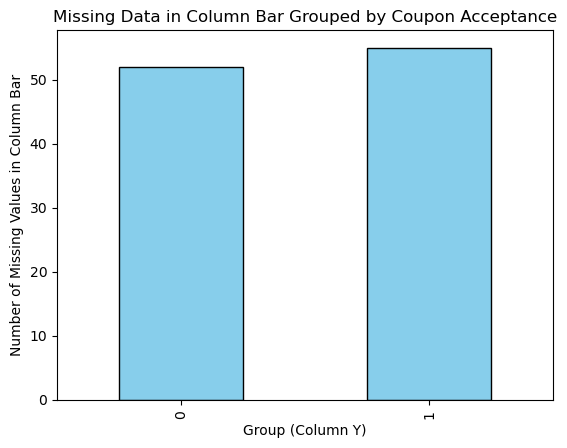

In [35]:
#I want to visualize the missing data in the Bar column to see the distribution between those accepted and not accepted
missing_by_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Group (Column Y)')
plt.ylabel('Number of Missing Values in Column Bar')
plt.title('Missing Data in Column Bar Grouped by Coupon Acceptance')
plt.show()

<Axes: >

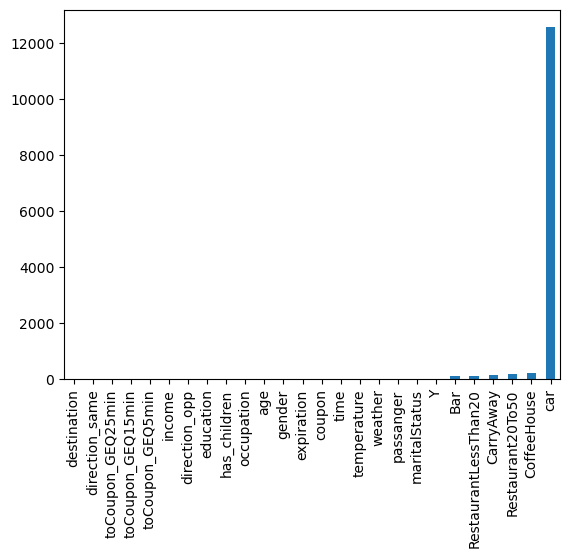

In [38]:
#I want to visualize missing values from all columns
data.isnull().sum().sort_values().plot(kind = 'bar')



3. Decide what to do about your missing data -- drop, replace, other...

In [42]:
# using the graph above, I first find the number of missing rows in the 'Bar' column
data['Bar'].isnull().sum()

107

In [ ]:
# since this is a small portion of the total responses and there are sufficient responses presented, I will replace null values with the mode of the values in the Bar column

In [48]:
response_counts = data['Bar'].value_counts()
print(response_counts)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [51]:
# Replace null responses with the response representing the mode 

data['Bar'].fillna('never', inplace=True)
response_counts = data['Bar'].value_counts()
print(response_counts)

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [54]:
# I will use the same method to replace null values in the other columns
data['RestaurantLessThan20'].isnull().sum()

130

In [57]:
response_counts2 = data['RestaurantLessThan20'].value_counts()
print(response_counts2)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


In [60]:
# Replace null responses with the response representing the mode 

data['RestaurantLessThan20'].fillna('1~3', inplace=True)
response_counts2 = data['RestaurantLessThan20'].value_counts()
print(response_counts2)

RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


In [63]:
data['CoffeeHouse'].isnull().sum()

217

In [66]:
# Find the mode of the responses

response_counts3 = data['CoffeeHouse'].value_counts()
print(response_counts3)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


In [69]:
# Replace null responses with the response representing the mode 

data['CoffeeHouse'].fillna('less1', inplace=True)
response_counts3 = data['CoffeeHouse'].value_counts()
print(response_counts3)

CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


In [72]:
data['Restaurant20To50'].isnull().sum()

189

In [75]:
# Find the mode of the responses

response_counts4 = data['Restaurant20To50'].value_counts()
print(response_counts4)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [78]:
# Replace null responses with the response representing the mode 

data['Restaurant20To50'].fillna('less1', inplace=True)
response_counts4 = data['Restaurant20To50'].value_counts()
print(response_counts4)

Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [81]:
data['CarryAway'].isnull().sum()

151

In [84]:
# Find the mode of the responses

response_counts5 = data['CarryAway'].value_counts()
print(response_counts5)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


In [87]:
# Replace null responses with the response representing the mode 

data['CarryAway'].fillna('1~3', inplace=True)
response_counts5 = data['CarryAway'].value_counts()
print(response_counts5)

CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


<Axes: >

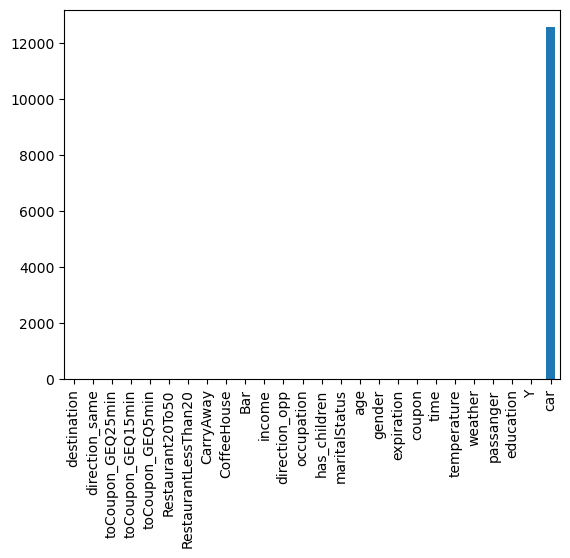

In [90]:
# I take a look at null values now
data.isnull().sum().sort_values().plot(kind = 'bar')

In [93]:
# I'm almost there... now to fix car column I will delete the column since there is not enoough data to replace with a mean or mode and one's type of car may not a significant determinant of whether a coupon is accepted.
#deleting 'car' column

data = data.drop('car', axis=1)


In [96]:
# Checking for null values.  There are none

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

<Axes: >

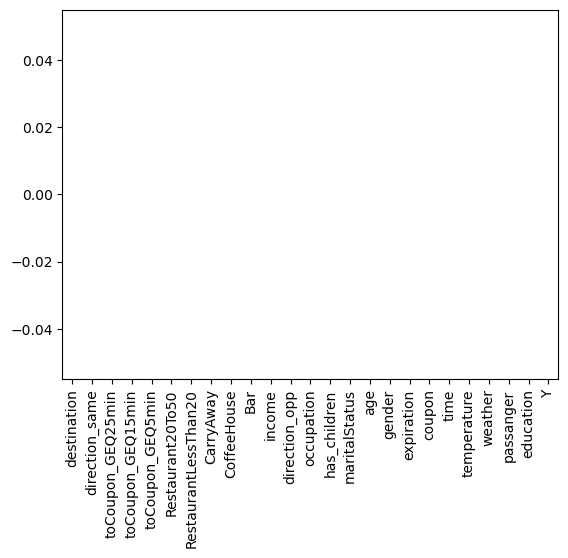

In [99]:
data.isnull().sum().sort_values().plot(kind = 'bar')

4. What proportion of the total observations chose to accept the coupon? 



In [102]:
# I want to save this cleaned data frame as 'data_clean'
data_clean = data.copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [105]:
# Count the occurrences of each value in 'Y'
coupon_counts = data_clean['Y'].value_counts()
print(coupon_counts)

Y
1    7210
0    5474
Name: count, dtype: int64


In [108]:
proportion_of_accept = coupon_counts.get(1, 0) / len(data_clean)
print("Proportion Accepting Coupon:", proportion_of_accept)

Proportion Accepting Coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [111]:
accept = data_clean.groupby('coupon')['Y'].sum()

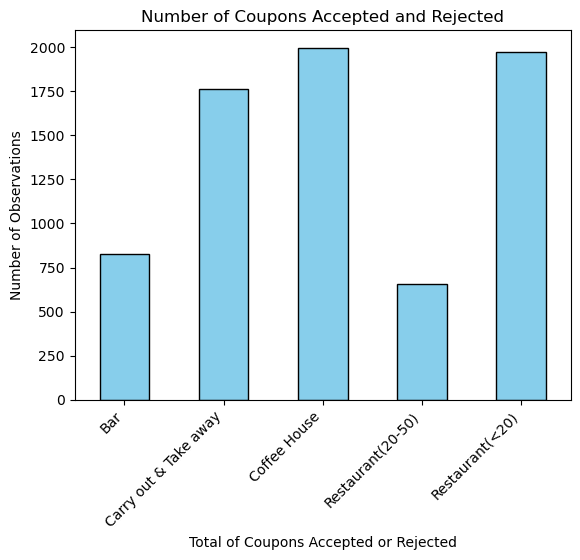

In [114]:
ax = accept.plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Total of Coupons Accepted or Rejected')
plt.ylabel('Number of Observations')
plt.title('Number of Coupons Accepted and Rejected')
plt.show()

Text(0.5, 1.0, 'Distribution of Coupon Accepted and Rejected by Coupon Type')

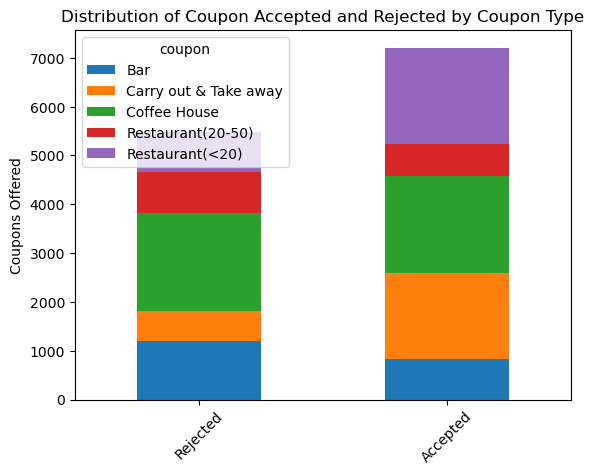

In [117]:
grouped_counts = data_clean.groupby(['Y', 'coupon']).size().unstack(fill_value=0)
ax = grouped_counts.plot(kind='bar', stacked=True)
coupon_labels = {0: 'Rejected', 1: 'Accepted'}
ax.set_xticklabels([coupon_labels[int(x)] for x in ax.get_xticks()],rotation=45)

# Adding labels and title
plt.xlabel('')
plt.ylabel('Coupons Offered')
plt.title('Distribution of Coupon Accepted and Rejected by Coupon Type')


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution of Coupon Acceptance at Various Temperatures')

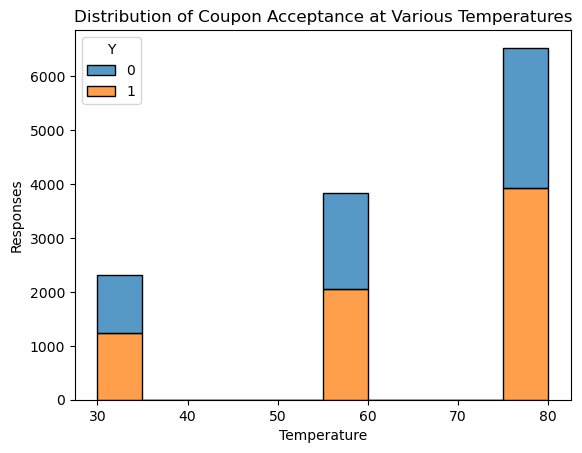

In [121]:
sns.histplot(data_clean, x='temperature', hue='Y', bins=10, edgecolor='black', multiple='stack')
coupon_labels = {0: 'Rejected', 1: 'Accepted'}
plt.xlabel('Temperature')
plt.ylabel('Responses')
plt.title('Distribution of Coupon Acceptance at Various Temperatures')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [127]:
newdata_bar = data_clean[data_clean['coupon'] == 'Bar'].copy()

print(newdata_bar)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

In [130]:
#verifying 
newdata_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [133]:
# I count the occurrences of each value in 'Y'
coupon_counts2 = newdata_bar['Y'].value_counts()
print(coupon_counts2)

Y
0    1190
1     827
Name: count, dtype: int64


In [136]:
#I find the proportion
proportion_of_accept_b = coupon_counts2.get(1, 0) / len(newdata_bar)
print("Proportion Accepting Coupon:", proportion_of_accept_b)

Proportion Accepting Coupon: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 1.0, 'Coupon Acceptance Rate based on Bar Patronship')

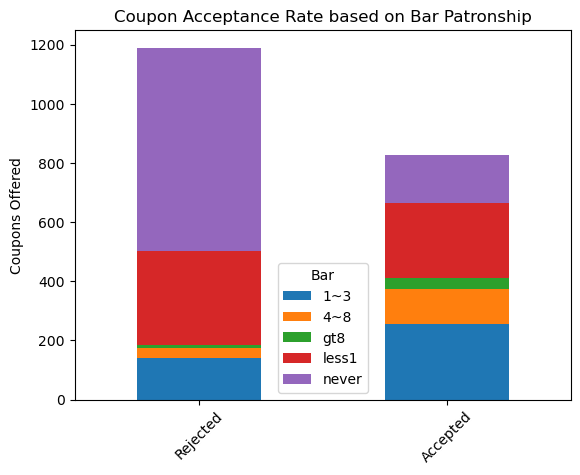

In [143]:
# I want to take a look of the bar distribution before further grouping

grouped_counts = newdata_bar.groupby(['Y', 'Bar']).size().unstack(fill_value=0)
ax = grouped_counts.plot(kind='bar', stacked=True)
coupon_labels = {0: 'Rejected', 1: 'Accepted'}
ax.set_xticklabels([coupon_labels[int(x)] for x in ax.get_xticks()],rotation=45)

# Adding labels and title
plt.xlabel('')
plt.ylabel('Coupons Offered')
plt.title('Coupon Acceptance Rate based on Bar Patronship')

In [146]:
#I create a new column to group the bar data
newdata_bar['bar_modified'] = newdata_bar['Bar'].replace({'never': '3 or fewer times', 'less1': '3 or fewer times', '1~3': '3 or fewer times', '4~8': 'More than 3', 'gt8': 'More than 3'})
grouped_counts = newdata_bar.groupby(['Y', 'bar_modified']).size().unstack(fill_value=0)


print(grouped_counts)

bar_modified  3 or fewer times  More than 3
Y                                          
0                         1144           46
1                          674          153


In [149]:
newdata_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

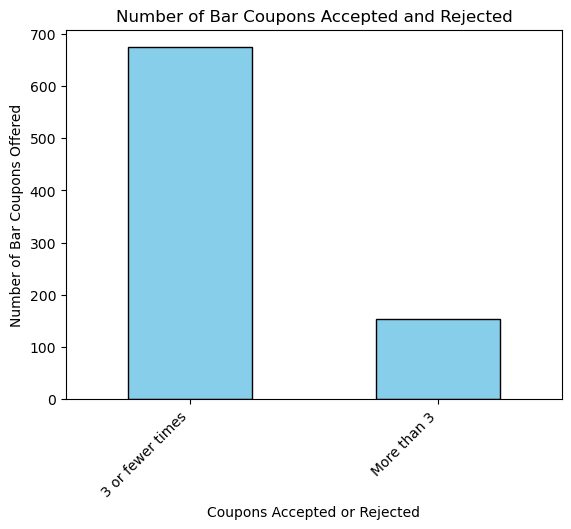

In [152]:
accept_bar = newdata_bar.groupby('bar_modified')['Y'].sum()
ax = accept_bar.plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Coupons Accepted or Rejected')
plt.ylabel('Number of Bar Coupons Offered')
plt.title('Number of Bar Coupons Accepted and Rejected')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [155]:
newdata_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

In [158]:
# create a new column that contains drivers who go to a bar more that once a month. *may contain data of drivers who go to a bar exactly once a month. 

newdata_bar['bar_once_plus'] = newdata_bar['Bar'].replace({'never': 'less than once', 'less1': 'less than once', '1~3': 'more that once', '4~8': 'more that once', 'gt8': 'more that once'})
grouped_counts_bar_once = newdata_bar.groupby(['Y', 'bar_once_plus']).size().unstack(fill_value=0)
newdata_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

In [161]:
print(grouped_counts_bar_once)

bar_once_plus  less than once  more that once
Y                                            
0                        1004             186
1                         417             410


In [172]:
newdata_bar['age_modified'] = newdata_bar['age'].replace({'below21': 'under 25','26': 'over 25', '31': 'over 25', '36': 'over 25', '41': 'over 25', '46': 'over 25', '50plus': 'over 25', '21': 'under 25'})
grouped_counts2 = newdata_bar.groupby(['Y', 'age_modified']).size().unstack(fill_value=0)


print(grouped_counts2)

age_modified  over 25  under 25
Y                              
0                 933       257
1                 580       247


In [174]:
grouped_counts2 = newdata_bar.groupby(['Y', 'age_modified']).size().unstack(fill_value=0)
additional_data = newdata_bar[newdata_bar['Bar'].isin(['less1', 'never'])]
additional_counts = additional_data.groupby(['Y', 'age_modified']).size().unstack(fill_value=0)

# I add the additional counts to the existing grouped_counts2 DataFrame
grouped_counts2 = grouped_counts2.add(additional_counts, fill_value=0)

print(grouped_counts2)

age_modified  over 25  under 25
Y                              
0                1738       456
1                 868       376


In [177]:
# first step to find the proportion. Count the occurrences of each value in 'Y'

coupon_counts2 = newdata_bar['Y'].value_counts()
print(coupon_counts2)

Y
0    1190
1     827
Name: count, dtype: int64


In [180]:
proportion_of_accept_3 = coupon_counts2.get(1, 0) / len(newdata_bar)
print("Proportion Accepting Coupon:", proportion_of_accept_3)

Proportion Accepting Coupon: 0.41001487357461575


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [245]:
filtered_data = newdata_bar[(newdata_bar['Bar'].isin(['more1'])) & 
                            (newdata_bar['age'] != 'kid') & 
                            (~newdata_bar['occupation'].isin(['farming', 'fishing', 'forestry']))]

In [248]:
grouped_counts3 = filtered_data.groupby(['Y', 'age_modified']).size().unstack(fill_value=0)

In [251]:
grouped_counts3 = grouped_counts3.add(grouped_counts2, fill_value=0)
print(grouped_counts3)

age_modified  over 25  under 25
Y                              
0              1738.0     456.0
1               868.0     376.0


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [270]:
filtered_data_2 = newdata_bar[(newdata_bar['Bar'].isin(['more1'])) & 
                               (newdata_bar['age'] != 'kid') & 
                               (~newdata_bar['maritalStatus'].isin(['widowed']))]

In [272]:
grouped_counts4 = filtered_data_2.groupby(['Y', 'age_modified']).size().unstack(fill_value=0)

In [280]:
grouped_counts4 = grouped_counts4.add(grouped_counts2, fill_value=0)
print(grouped_counts4)


age_modified  over 25  under 25
Y                              
0              6952.0    1824.0
1              3472.0    1504.0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Observations and findings**

Overall 41% of all drivers accepted bar coupons.  The acceptance rates goes up significantly when we compare drivers who went to a bar more than 3 times a month.  Simularly, the acceptance rates goes up when we look at drivers over 25 years old compared to drivers under 25 years old. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Is there a higher acceptance rate for coupons that expire in less than 2 hours vs 1 day and what types of coupons are accepted more?**

In [184]:
#is there a higher acceptance rate for <2hour vs 1 day adn what types of coupons are higher
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [187]:
expiration = data_clean.groupby(['coupon', 'expiration']).size().reset_index(name='count')

print(expiration)

                  coupon expiration  count
0                    Bar         1d   1556
1                    Bar         2h    461
2  Carry out & Take away         1d   1456
3  Carry out & Take away         2h    937
4           Coffee House         1d   1769
5           Coffee House         2h   2227
6      Restaurant(20-50)         1d    956
7      Restaurant(20-50)         2h    536
8        Restaurant(<20)         1d   1354
9        Restaurant(<20)         2h   1432


In [190]:
expiration2 = data_clean.groupby(['expiration', 'coupon']).size().reset_index(name='count')

print(expiration2)

  expiration                 coupon  count
0         1d                    Bar   1556
1         1d  Carry out & Take away   1456
2         1d           Coffee House   1769
3         1d      Restaurant(20-50)    956
4         1d        Restaurant(<20)   1354
5         2h                    Bar    461
6         2h  Carry out & Take away    937
7         2h           Coffee House   2227
8         2h      Restaurant(20-50)    536
9         2h        Restaurant(<20)   1432


In [193]:
filtered_expiration = data_clean[data_clean['Y'] == 1]
print(filtered_expiration)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
5      No Urgent Place  Friend(s)   Sunny           80   6PM   
6      No Urgent Place  Friend(s)   Sunny           55   2PM   
7      No Urgent Place     Kid(s)   Sunny           80  10AM   
...                ...        ...     ...          ...   ...   
12671  No Urgent Place    Partner   Snowy           30  10AM   
12676             Home      Alone   Sunny           80   6PM   
12677             Home    Partner   Sunny           30   6PM   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  .

In [196]:
result4 = filtered_expiration.groupby(['coupon', 'expiration']).size().reset_index(name='count')

print(result4)

                  coupon expiration  count
0                    Bar         1d    641
1                    Bar         2h    186
2  Carry out & Take away         1d   1138
3  Carry out & Take away         2h    622
4           Coffee House         1d   1033
5           Coffee House         2h    962
6      Restaurant(20-50)         1d    498
7      Restaurant(20-50)         2h    160
8        Restaurant(<20)         1d   1126
9        Restaurant(<20)         2h    844


In [199]:
pivot_result = result4.pivot(index='coupon', columns='expiration', values='count').fillna(0)

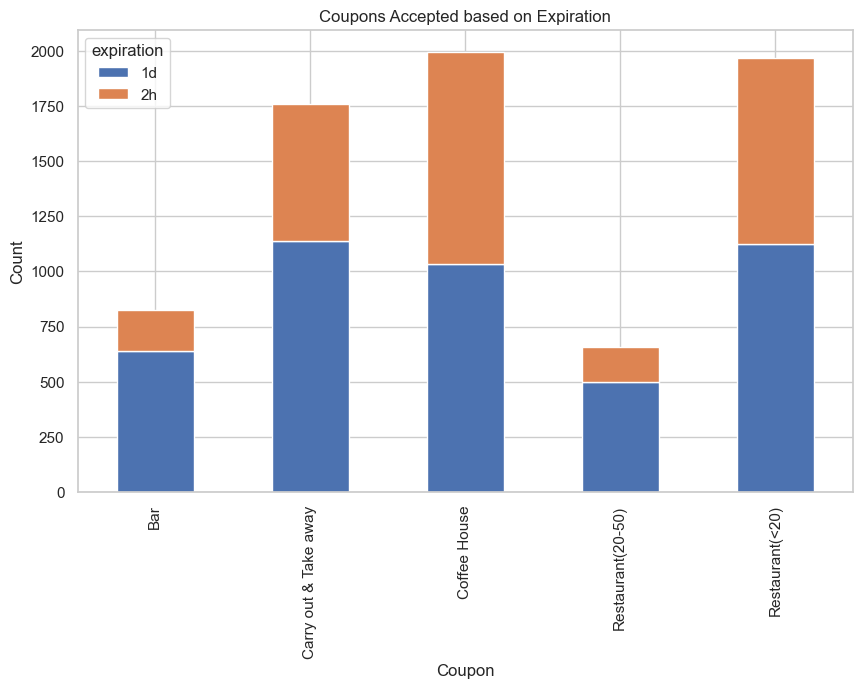

In [202]:
sns.set(style="whitegrid")
pivot_result.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Coupons Accepted based on Expiration')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()

**Do coupons for restaurants costing more than 20 dollars have a higher acceptance rate with incomes greater than $25,000?**

In [229]:
newdata_income = data_clean[data_clean['coupon'] == 'Restaurant(20-50)'].copy()

print(newdata_income)

           destination passanger weather  temperature  time  \
14                Home     Alone   Sunny           55   6PM   
18                Work     Alone   Sunny           80   7AM   
36                Home     Alone   Sunny           55   6PM   
40                Work     Alone   Sunny           80   7AM   
58                Home     Alone   Sunny           55   6PM   
...                ...       ...     ...          ...   ...   
12657             Home     Alone   Sunny           80   6PM   
12661             Work     Alone   Sunny           80   7AM   
12669  No Urgent Place   Partner   Sunny           30  10AM   
12676             Home     Alone   Sunny           80   6PM   
12683             Work     Alone   Sunny           80   7AM   

                  coupon expiration  gender age      maritalStatus  ...  \
14     Restaurant(20-50)         1d  Female  21  Unmarried partner  ...   
18     Restaurant(20-50)         1d  Female  21  Unmarried partner  ...   
36     Restaurant(

In [232]:
newdata_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 14 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1492 non-null   object
 1   passanger             1492 non-null   object
 2   weather               1492 non-null   object
 3   temperature           1492 non-null   int64 
 4   time                  1492 non-null   object
 5   coupon                1492 non-null   object
 6   expiration            1492 non-null   object
 7   gender                1492 non-null   object
 8   age                   1492 non-null   object
 9   maritalStatus         1492 non-null   object
 10  has_children          1492 non-null   int64 
 11  education             1492 non-null   object
 12  occupation            1492 non-null   object
 13  income                1492 non-null   object
 14  Bar                   1492 non-null   object
 15  CoffeeHouse           1492 non-null   obj

In [235]:
newdata_income['income_modified'] = newdata_income['income'].replace({'$25000 - $37499': 'less than $75000', '$12500 - $24999': 'less than $75000', 'Less than $12500': 'less than $75000', '$37500 - $49999': 'less than $75000', '$50000 - $62499': 'less than $75000', '$62500 - $74999': 'less than $75000', '$87500 - $99999': '> $75000', '$100000 or More': '> $75000', '$75000 - $87499': '> $75000'})
grouped_counts_income1 = newdata_income.groupby(['Y', 'income_modified']).size().unstack(fill_value=0)

print(grouped_counts_income1)

income_modified  > $75000  less than $75000
Y                                          
0                     235               599
1                     192               466


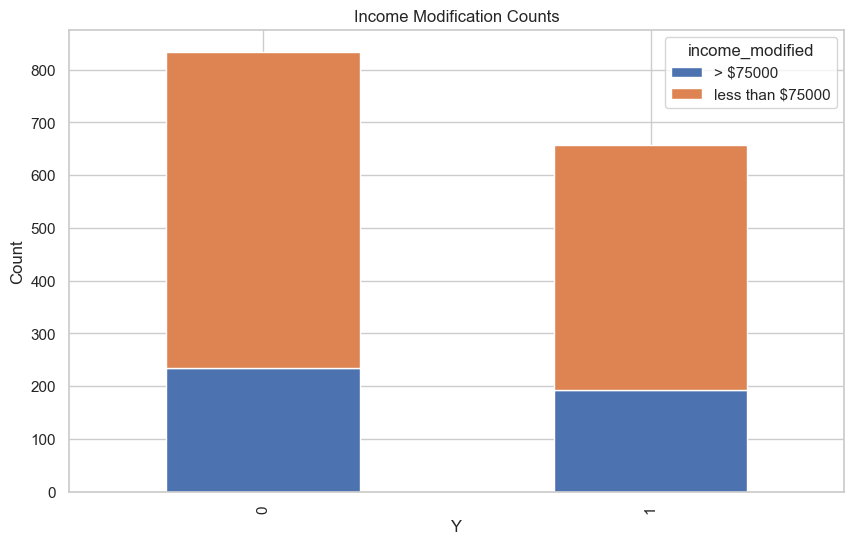

In [238]:
sns.set(style="whitegrid")
grouped_counts_income1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Income Modification Counts')
plt.xlabel('Y')
plt.ylabel('Count')
plt.show()

In [241]:
percentage_responses = newdata_income.groupby('income_modified')['Y'].mean() * 100

print(percentage_responses)

income_modified
> $75000            44.964871
less than $75000    43.755869
Name: Y, dtype: float64
